## Learnning project for Sprint 4: Data Visualization with Python

https://intra.turingcollege.com/hardskills/data-visualization-with-python-v3

dataset from Kaggle:
https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset/data

Objectives for this Part
- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using Pandas.
Requirements
- Download the data from Coursera Course Dataset.
- Load the data using Pandas.
- Perform data cleaning.
- Perform exploratory data analysis.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, the results you got, and what these results mean.
- Provide suggestions on how your analysis could be improved.

Evaluation Criteria
- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused - code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

### Download the data from Coursera Course Dataset.
Dataset downloaded to 'datasets' folder

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# to have tips in the notebook
%config Completer.use_jedi = False

### Load the data using Pandas.

In [4]:
df = pd.read_csv('datasets/coursea_data.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Perform data cleaning.

In [6]:
df.describe()

,course_rating
count,891.000000
mean,4.677329
std,0.162225
min,3.300000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


There is only one numeric column: "course_rating". Values looks to be adequate.

The average rating is 4.68

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [8]:
df[df.isna().any(axis=1)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled


No missing data

In [9]:
df.drop(columns='course_rating').describe()

,course_title,course_organization,course_Certificate_type,course_difficulty,course_students_enrolled
count,891,891,891,891,891
unique,888,154,3,4,205
top,Developing Your Musicianship,University of Pennsylvania,COURSE,Beginner,120k
freq,2,59,582,487,22


There are 3 duplicated values in "course_title" column. Let's determine it.

In [10]:
df[df['course_title'].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


A course appears twice in one course_organization and with different "course_Certificate_type" and looks like it is two different courses. 
There are two more courses with the same names from different course organizations.

In [11]:
df['course_Certificate_type'].value_counts()

course_Certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64

"course_Certificate_type" column looks fine.

In [12]:
df['course_difficulty'].value_counts()

course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

'course_difficulty' column looks fine.

In [13]:
df['course_students_enrolled'].value_counts()

course_students_enrolled
120k    22
110k    20
12k     20
22k     19
14k     17
        ..
8.5k     1
90k      1
2.5m     1
6.1k     1
9.8k     1
Name: count, Length: 205, dtype: int64

'course_students_enrolled' column is supposed to be numeric: it's values contain 'k', 'm' and possibly other letters meaning 1000 and 1000000. It needs to be converted to numbers.

In [14]:
any(df['course_students_enrolled'].str.isnumeric())

False

All 'course_students_enrolled' values are not-numeric.

In [15]:
df['course_students_enrolled'].str.replace(r'\d|\.*', '' , regex=True).unique()

array(['k', 'm'], dtype=object)

Only 'k', 'm' letters exist in the column.

In [16]:
# a function to get numeric value from 'course_students_enrolled' column (with 'k' and 'm' letters)
def convert_values_to_numeric(val: str):
    num = val[:-1]
    mult_letter = val[-1:]
    mult_factor = 1
    if mult_letter == 'k':
        mult_factor = 1000
    elif mult_letter == 'm':
        mult_factor = 1000000
    return int(float(num)*mult_factor)

In [17]:
# function test:
convert_values_to_numeric('32m')

32000000

In [18]:
df['course_students_enrolled_numeric'] = df['course_students_enrolled'].apply(convert_values_to_numeric)

In [19]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_students_enrolled_numeric
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000


In [20]:
df['course_students_enrolled_numeric'].dtype

dtype('int64')

'course_students_enrolled_numeric' column has numeric values

### Perform exploratory data analysis

582 of 891 courses are marked as 'Course'

487 of 891 courses are marked as for begginers.

In [21]:
df['course_students_enrolled_numeric'].describe()

count    8.910000e+02
mean     9.055208e+04
std      1.819365e+05
min      1.500000e+03
25%      1.750000e+04
50%      4.200000e+04
75%      9.950000e+04
max      3.200000e+06
Name: course_students_enrolled_numeric, dtype: float64

Students counts in courses: from 1.5k to 3.2m with 90.6k average.

In [22]:
print(f"Top most popular courses:")
df.sort_values(['course_students_enrolled_numeric'], ascending=False).head()

Top most popular courses:


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_students_enrolled_numeric
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,3200000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m,1500000
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1.3m,1300000
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830k,830000


In [23]:
df.corr(numeric_only=True)

,course_rating,course_students_enrolled_numeric
course_rating,1.00000,0.07109
course_students_enrolled_numeric,0.07109,1.00000


No correlation between course_rating and course popularity for all courses.

In [24]:
df['course_organization'].value_counts().head(10)

course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Duke University                               28
Johns Hopkins University                      28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: count, dtype: int64

In [25]:
print(f"Top 6 course organizations: {df['course_organization'].value_counts().head(6).index.to_list()}")

Top 6 course organizations: ['University of Pennsylvania', 'University of Michigan', 'Google Cloud', 'Duke University', 'Johns Hopkins University', 'University of California, Irvine']


In [63]:
sns.set(rc = {'figure.figsize':(11,3)})

In [68]:
df['course_difficulty'].value_counts()

course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

487 of 891 courses are Beginner level.

<Axes: xlabel='Count', ylabel='course_difficulty'>

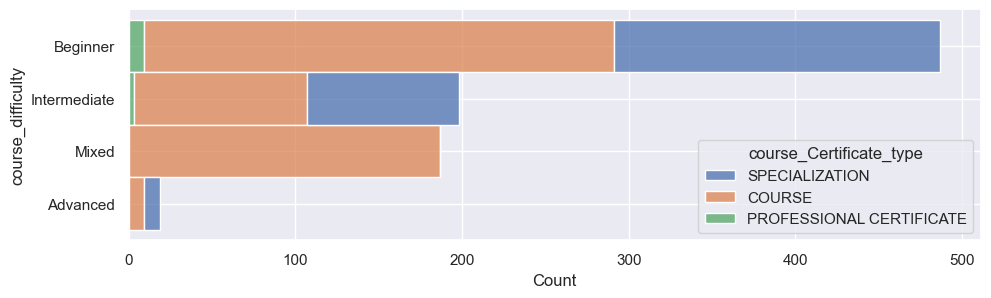

In [64]:
sns.histplot(df, y='course_difficulty', hue='course_Certificate_type', multiple="stack")

The histogram shown above provides information, that courses with 'Professional certificate' are mostly for level 'Beginner', and that 'Mixed' difficulty level courses are all marked as 'Course' certificate type courses.

In [66]:
sns.set(rc = {'figure.figsize':(11,6)})

<Axes: xlabel='course_rating', ylabel='course_students_enrolled_numeric'>

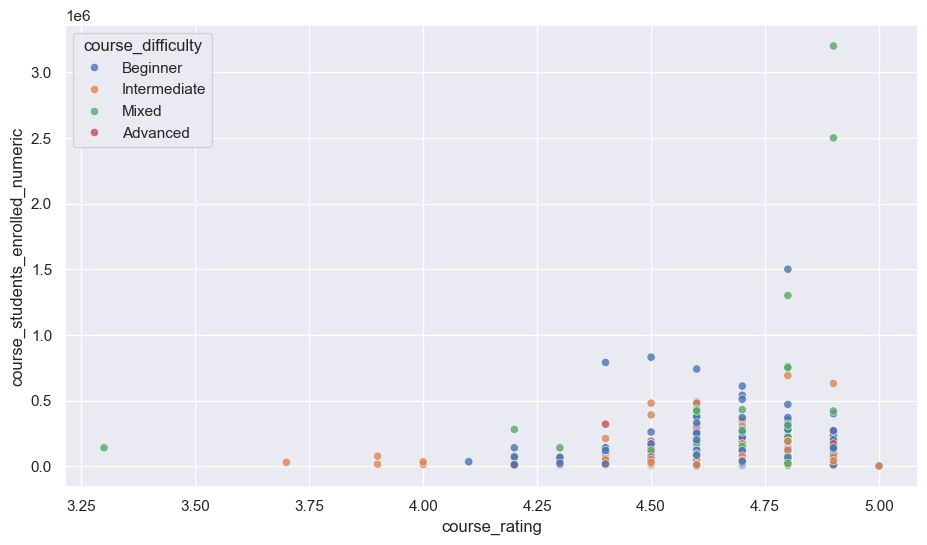

In [67]:
sns.scatterplot(df, x='course_rating', y='course_students_enrolled_numeric', alpha=0.8,  hue='course_difficulty')

In [28]:
sns.set(rc = {'figure.figsize':(12,8)})

<Axes: xlabel='course_rating', ylabel='course_students_enrolled_numeric'>

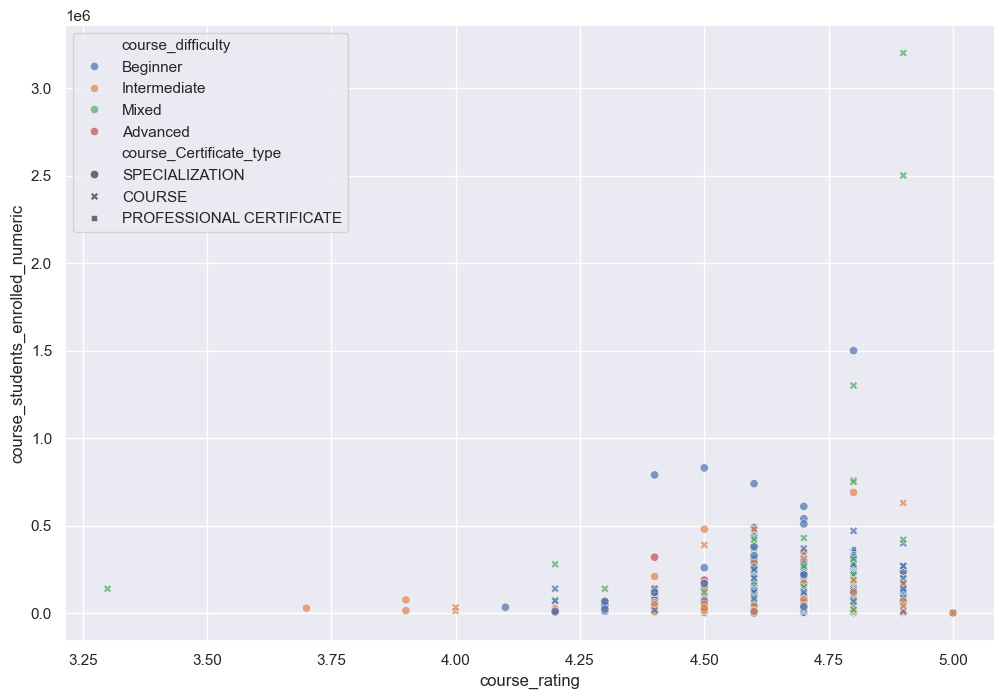

In [29]:
sns.scatterplot(df, x='course_rating', y='course_students_enrolled_numeric', alpha=0.7,  hue='course_difficulty', style='course_Certificate_type')

The chart above shows that 3 of 4 most popular courses (that have more than 1 million students) have certification type 'Course' and mixed difficulty.

Let's have a look at this scatter plot with 500k enrolled students treshold.

In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='course_rating', ylabel='course_students_enrolled_numeric'>

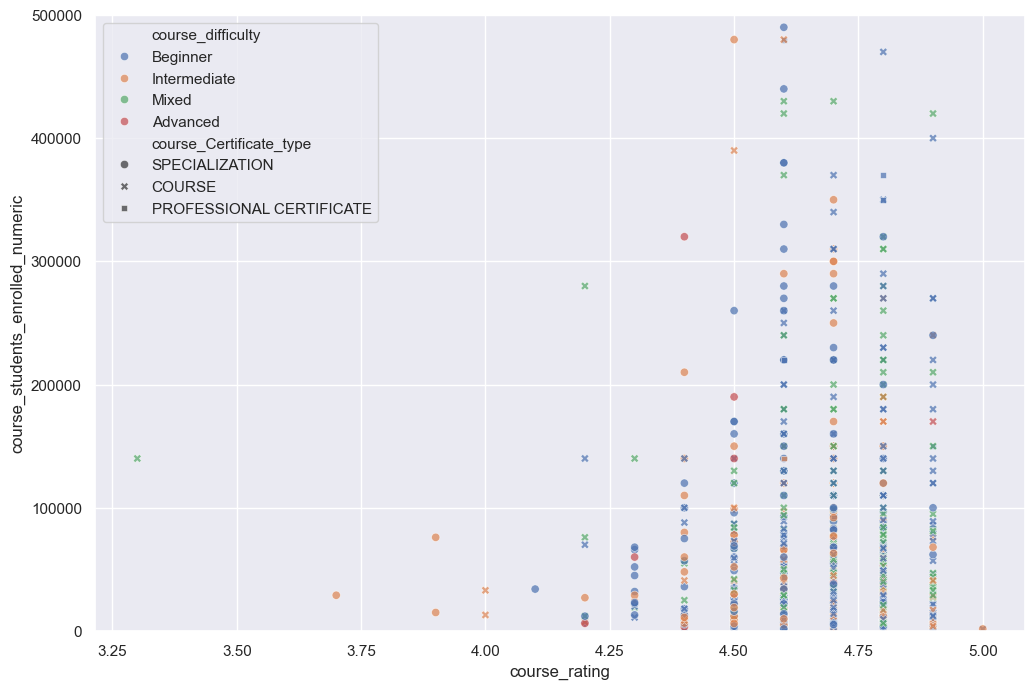

In [31]:
fig, ax = plt.subplots()
ax.set_ylim(0, 500000)
sns.scatterplot(df, x='course_rating', y='course_students_enrolled_numeric', alpha=0.7,  hue='course_difficulty', style='course_Certificate_type', ax=ax)

The chart shows that 5 of 6 courses with the lowest rating have 'intermediate' difficulty level. The lowest rating has a course marked as 'mixed' difficulty and 'course' as certification type, this course gathered around 140k students (that is quite high, as average is 90.5k).

In [32]:
# There are courses with rating 5:
df.sort_values(by=['course_rating', 'course_students_enrolled_numeric'], ascending=False).head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_students_enrolled_numeric
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6k,1600
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5k,1500
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,3200000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000
62,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630k,630000
111,Python Data Structures,University of Michigan,COURSE,4.9,Mixed,420k,420000
113,First Step Korean,Yonsei University,COURSE,4.9,Beginner,400k,400000
123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,COURSE,4.9,Beginner,270k,270000
29,Introduction to Psychology,Yale University,COURSE,4.9,Beginner,270k,270000
207,Convolutional Neural Networks,deeplearning.ai,COURSE,4.9,Intermediate,240k,240000


Two courses with rating 5.0 with not many enrolled 1500 and 1600 students. 
The most popular and successful courses: Machine Learning from Stanford University and The Science of Well-Being from Yale University with correspondingly 3.2m and 2.5m students.
The following most popular courses: Python for Everybody from University of Michigan (marked as SPECIALIZATION) with 1.5m students and Programming for Everybody (Getting Started wit... from University of Michigan with 1.3m students.

##### Course rating by difficulty:

In [33]:
sns.set(rc = {'figure.figsize':(14,3)})

<Axes: xlabel='course_rating'>

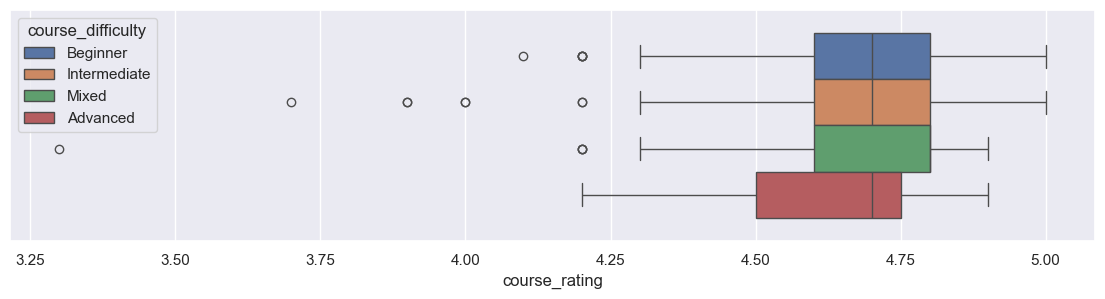

In [34]:
sns.boxplot(df, x='course_rating', hue='course_difficulty')

In [35]:
df.groupby('course_difficulty')['course_rating'].mean()

course_difficulty
Advanced        4.600000
Beginner        4.680903
Intermediate    4.646465
Mixed           4.708556
Name: course_rating, dtype: float64

<Axes: xlabel='course_difficulty'>

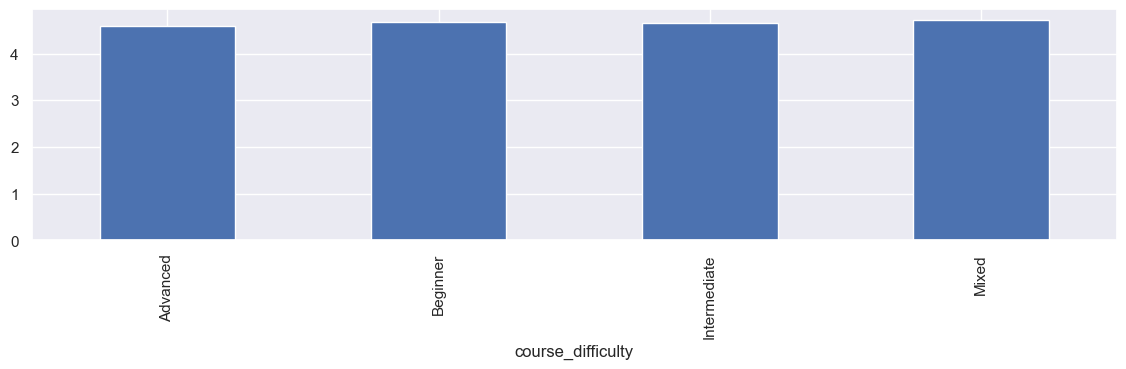

In [36]:
df.groupby('course_difficulty')['course_rating'].mean().plot.bar()

Course rating values are similarly distributed for all difficulties.

##### Course popularity by difficulty:

<Axes: xlabel='course_students_enrolled_numeric'>

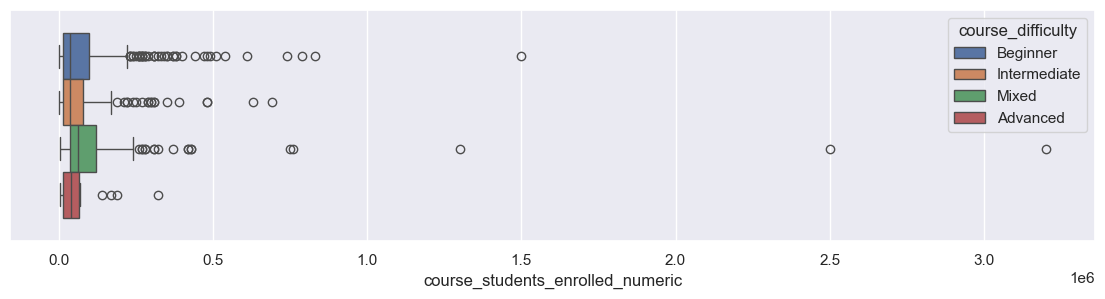

In [37]:
sns.boxplot(df, x='course_students_enrolled_numeric', hue='course_difficulty')

<Axes: xlabel='course_difficulty'>

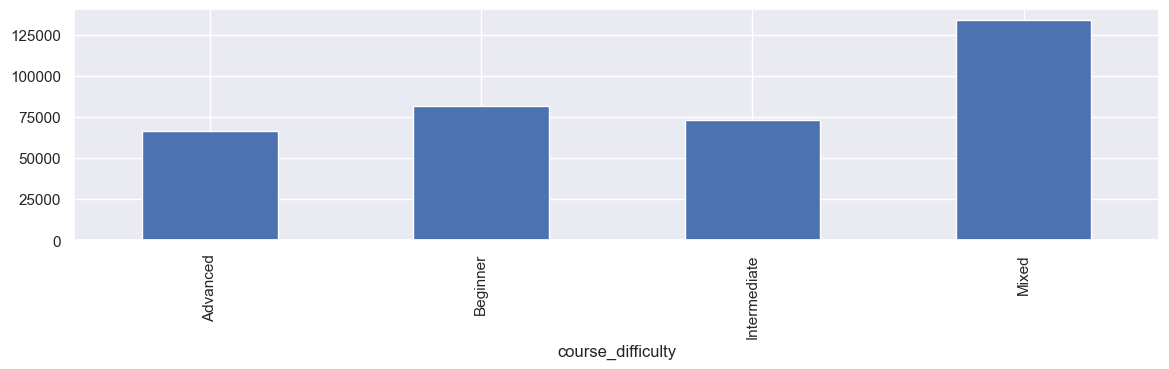

In [38]:
df.groupby('course_difficulty')['course_students_enrolled_numeric'].mean().plot.bar()

In [47]:
df.groupby('course_difficulty')['course_students_enrolled_numeric'].mean()

course_difficulty
Advanced         66547.368421
Beginner         81974.948665
Intermediate     73264.141414
Mixed           133633.155080
Name: course_students_enrolled_numeric, dtype: float64

Mixed courses have more populararity in average (twice more students than the lowest by popularity Advanced courses).

In [71]:
sns.set(rc = {'figure.figsize':(13,6)})

<Axes: xlabel='course_rating', ylabel='Count'>

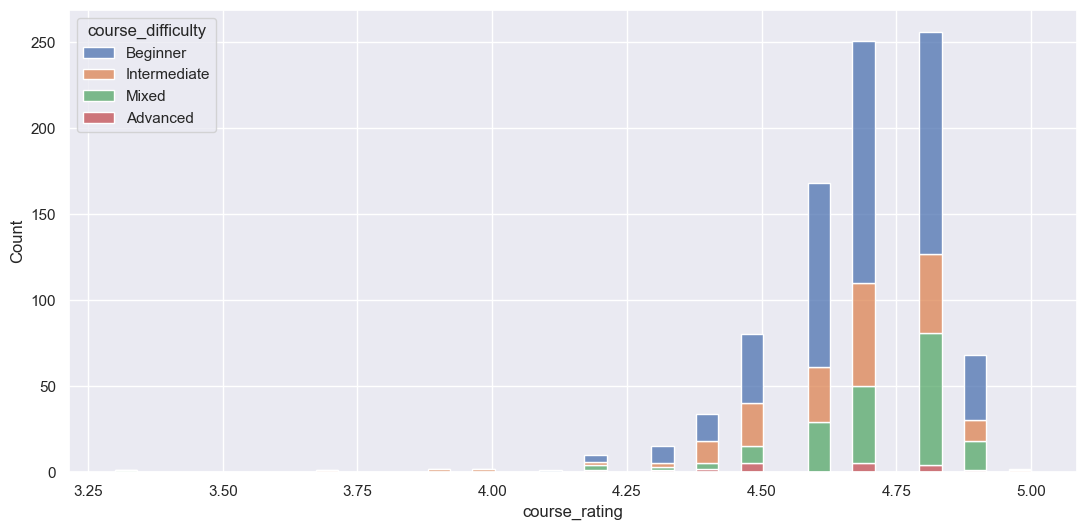

In [41]:
sns.histplot(df, x='course_rating', hue='course_difficulty', multiple="stack")

<Axes: xlabel='course_rating', ylabel='Count'>

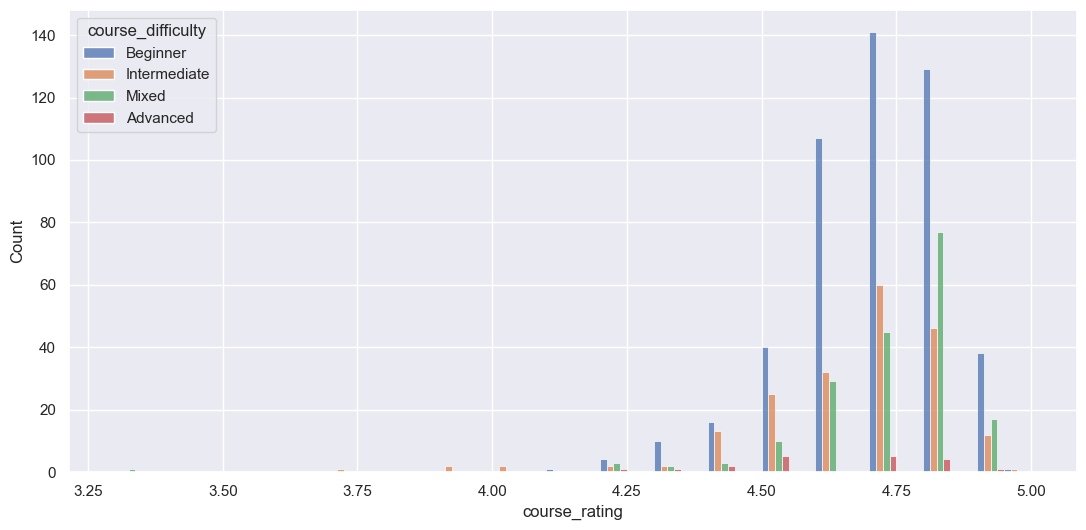

In [42]:
sns.histplot(df, x='course_rating', hue='course_difficulty', multiple="dodge", binwidth=0.05)

In [86]:
sns.set(rc = {'figure.figsize':(12,2)})

Text(0.5, 1.0, 'Course counts by certificate')

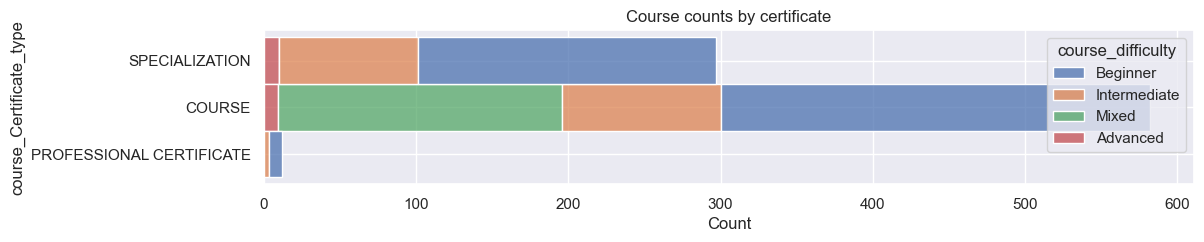

In [87]:
sns.histplot(df, y='course_Certificate_type', hue='course_difficulty', multiple="stack").set_title("Course counts by certificate")

In [88]:
df.groupby('course_Certificate_type')['course_students_enrolled_numeric'].mean()

course_Certificate_type
COURSE                       87854.467354
PROFESSIONAL CERTIFICATE    190700.000000
SPECIALIZATION               91791.919192
Name: course_students_enrolled_numeric, dtype: float64

<Axes: xlabel='course_students_enrolled_numeric', ylabel='course_Certificate_type'>

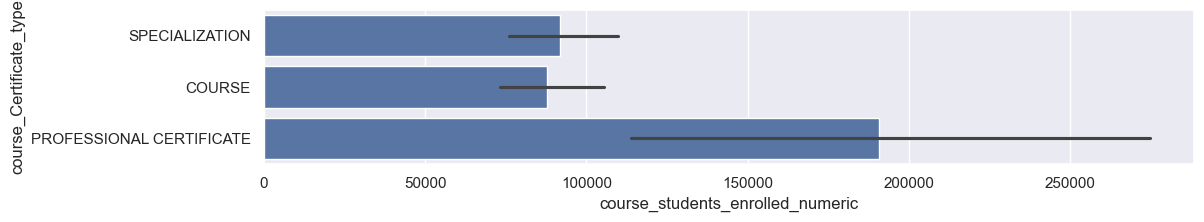

In [89]:
sns.barplot(df, x='course_students_enrolled_numeric', y='course_Certificate_type')

The most popular certification is 'PROFESSIONAL CERTIFICATE' with twice higher average number of students than for the other types.

<Axes: xlabel='course_rating', ylabel='course_Certificate_type'>

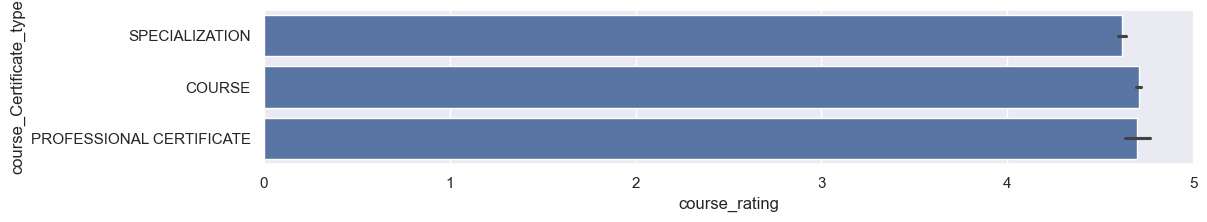

In [90]:
sns.barplot(df, x='course_rating', y='course_Certificate_type')

Rating are similar for all certification types.

#### Conclusions

- Most courses have the certification type 'Course' (582 of 891).
- There are only 12 courses with 'PROFESSIONAL CERTIFICATE' certification type.
- 'PROFESSIONAL CERTIFICATE' is the most popular certification type.
- The majority of courses have 'Beginner' level (487 of 891).
- Mixed courses have more popularity in average.
- Course rating is similar for all difficulties and for all certification types.
- The most popular and successful courses (with rating 4.9): Machine Learning from Stanford University and The Science of Well-Being from Yale - - - University with correspondingly 3.2m and 2.5m students. 
- There are only two courses with a rating 5 (with not many students enrolled).